In [72]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg
import cvxopt
import cvxopt.solvers
def linear_kernel(x1, x2):
    return np.dot(x1, x2)

def fit(X,y):
    n_samples, n_features = X.shape
    # Gram matrix
    K = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            K[i,j] = linear_kernel(X[i], X[j])

    P = cvxopt.matrix(np.outer(y,y) * K)
    q = cvxopt.matrix(np.ones(n_samples) * -1)
    A = cvxopt.matrix(y, (1,n_samples))
    b = cvxopt.matrix(0.0)
    C=10
    tmp1 = np.diag(np.ones(n_samples) * -1)
    tmp2 = np.identity(n_samples)
    G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
    tmp1 = np.zeros(n_samples)
    tmp2 = np.ones(n_samples) * C
    h = cvxopt.matrix(np.hstack((tmp1, tmp2)))

    # solve QP problem
    solution = cvxopt.solvers.qp(P, q, G, h, A, b)

    # Lagrange multipliers
    a = np.ravel(solution['x']) #flatten array

    # Support vectors have non zero lagrange multipliers
    sv = a > 1e-5
    ind = np.arange(len(a))[sv]
    a = a[sv]
    sv_x = X[sv]
    sv_y = y[sv]

    #print("%d support vectors out of %d points" % (len(a), n_samples))

    # Intercept
    b = 0
    for n in range(len(a)):
        b += sv_y[n]
        b -= np.sum(a * sv_y * K[ind[n],sv])
    b /= len(a)

    # Weight vector
    w = np.zeros(n_features)
    for n in range(len(a)):
        w += a[n] * sv_y[n] * sv_x[n]
    return w,b,sv_x

In [73]:
def project(w,b, X):
    return np.dot(X, w) + b

def predict(w,b,X):
    return np.sign(project(w,b,X))

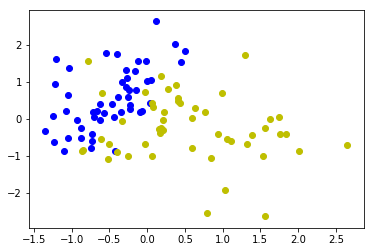

In [74]:
file = open("iris-pca.txt","r")

PC1=[]
PC2=[]

Y=[]
x=[]
    #Repeat for each song in the text file
for line in file:  
#Let's split the line into an array called "fields" using the "," as a separator:
    fields = line.split()
#and let's extract the data:
    PC1 = np.append(PC1,float(fields[0]))
    PC2 = np.append(PC2,float(fields[1]))
    Y = np.append(Y,float(fields[2])) #y is label
file.close()
X=np.column_stack([PC1,PC2])
Y[Y==0] =-1
Y[Y==2] =1
#PC11=PC1[Y==0]
X1=X[Y==-1]
Y1=Y[Y==-1]
X2=X[Y==1]
Y2=Y[Y==1]
plt.scatter(X1[:, 0], X1[:, 1], c = 'b')
plt.scatter(X2[:, 0], X2[:, 1], c = 'y')
plt.show()

In [75]:
X1_train = X1[:25]
y1_train = Y1[:25]
X2_train = X2[:25]
y2_train = Y2[:25]
X_train = np.vstack((X1_train, X2_train))
y_train = np.hstack((y1_train, y2_train))
X1_test = X1[25:]
y1_test = Y1[25:]
X2_test = X2[25:]
y2_test = Y2[25:]
X_test = np.vstack((X1_test, X2_test))
y_test = np.hstack((y1_test, y2_test))

w,b,sv=fit(X_train, y_train)
display(w)
display(b)
display("HERE")
y_predict = predict(w,b,X_test)
display(y_predict)

correct = np.sum(y_predict == y_test)
print("%d out of %d predictions correct" % (correct, len(y_predict)));
x_wrong=X_test[y_predict != y_test]

     pcost       dcost       gap    pres   dres
 0: -1.4003e+02 -4.4280e+03  1e+04  8e-01  9e-15
 1: -8.7387e+01 -1.6027e+03  2e+03  6e-02  1e-14
 2: -1.2462e+02 -3.3197e+02  2e+02  6e-03  2e-14
 3: -1.6750e+02 -2.4224e+02  8e+01  2e-03  7e-15
 4: -1.8250e+02 -2.1360e+02  3e+01  6e-04  7e-15
 5: -1.9068e+02 -2.0152e+02  1e+01  2e-04  6e-15
 6: -1.9426e+02 -1.9726e+02  3e+00  4e-05  9e-15
 7: -1.9499e+02 -1.9603e+02  1e+00  1e-05  8e-15
 8: -1.9536e+02 -1.9560e+02  2e-01  5e-07  7e-15
 9: -1.9546e+02 -1.9547e+02  4e-03  8e-09  8e-15
10: -1.9546e+02 -1.9546e+02  4e-05  8e-11  7e-15
Optimal solution found.
21 support vectors out of 50 points


array([ 2.477573  , -1.10581408])

1.030261113637221

'HERE'

array([-1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1., -1., -1.,
        1., -1., -1., -1., -1., -1., -1.,  1.,  1., -1.,  1., -1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

43 out of 50 predictions correct


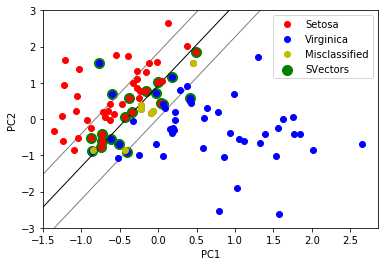

In [77]:
import pylab as pl
pl.plot(X1_train[:,0], X1_train[:,1], "ro",label='Setosa')
pl.plot(X2_train[:,0], X2_train[:,1], "bo",label='Virginica')
pl.plot(X1_test[:,0], X1_test[:,1], "ro")
pl.plot(X2_test[:,0], X2_test[:,1], "bo")
pl.plot(x_wrong[:,0], x_wrong[:,1],"yo",label='Misclassified')
pl.scatter(sv[:,0], sv[:,1], s=100, c="g",label='SVectors')
pl.xlabel('PC1')
pl.ylabel('PC2')
X1, X2 = np.meshgrid(np.linspace(-1.5,2.5,50), np.linspace(-3,3,50))
X = np.array([[x1, x2] for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])
Z = project(w,b,X).reshape(X1.shape)

pl.contour(X1, X2, Z, [0.0], colors='k', linewidths=1, origin='lower')
pl.contour(X1, X2, Z + 1, [0.0], colors='grey', linewidths=1, origin='lower')
pl.contour(X1, X2, Z - 1, [0.0], colors='grey', linewidths=1, origin='lower')
pl.legend()
pl.axis("tight")
pl.show()